In [14]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm

import xtrack as xt
import xobjects as xo
import xpart as xp


beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


current=2.4
length = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 100e-3 # <E> [eV] = kb*T
T_l =  1e-3 # <E> [eV]
magnetic_field = 0.060 # T for AD
B_ratio=1e-10



c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



circumference = 182.43280000000 #m
T = circumference/(c*beta_rel)
s_per_turn = T


beta_x=10 
beta_y=4

#disp_x=0.12

                                        


Parameters: $I=2.4 A, B=0.060 T, \beta_x=10 m,\beta_y=4,D_x=0.12 m T_\perp=100meV,T_\parallel=1meV,\epsilon_{x}=35*1e-6,\epsilon_{y}=35*1e-6,dp/p=1e-3$

In [15]:
cooling_time=[]
num_particles=1

disp_values=np.linspace(-10, 10, num=50)

for disp in tqdm(disp_values):
     
    disp_x=disp
    

    arc=xt.LinearTransferMatrix(Q_x=5.44, Q_y=5.42,
                                beta_x_0=beta_x, beta_x_1=beta_x,
                                beta_y_0=beta_y,  beta_y_1=beta_y,
                                alpha_x_0=0,   alpha_x_1=0,
                                alpha_y_0=0,   alpha_y_1=0,
                                disp_x_0=disp_x,disp_x_1=disp_x,
                                disp_y_0=0,    disp_y_1=0,
                                beta_s=1*1e40,
                                Q_s=0,
                                chroma_x=0.0, chroma_y=0)

    delta_single=2e-3

    particles = xp.Particles(
            
            mass0=mass0,
            p0c=p0c,
            x=disp_x*delta_single,
            px=0,
            y=0,
            py=0,
            delta=delta_single,
            zeta=0)


    cooler = xt.ElectronCooler(current=current,length=length,r_beam=r_beam,
                                            T_perp=T_perp,T_l=T_l,
                                            magnetic_field=magnetic_field,B_ratio=B_ratio,
                                            Neutralisation_space_charge=1)

        

    num_turns=int(1*1e7)


    # initialize arrays
    x, px, delta, action_x = [], [], [], []
    
    # loop over turns
    for i in tqdm(range(num_turns), desc='Cooling Progress', leave=False):
        if particles.delta < 0.1* delta_single:
                    cooling_time.append(i*s_per_turn)
                    break

        
        # track particle
        arc.track(particles)
        cooler.track(particles)
    
   
    if particles.delta >= 0.1* delta_single:
        cooling_time.append(num_turns * s_per_turn)  # Append default value if cooling condition is not met
            

  0%|          | 0/50 [00:03<?, ?it/s]


KeyboardInterrupt: 

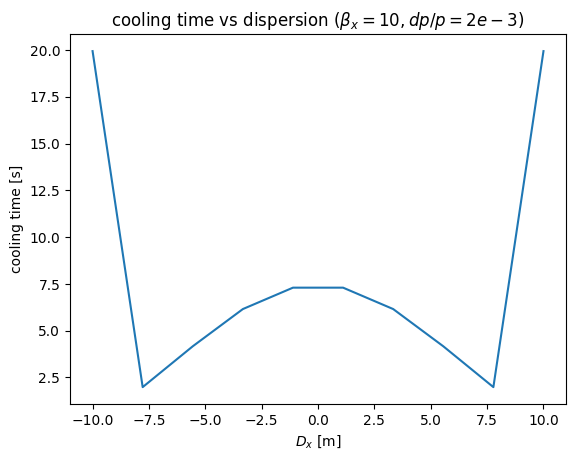

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(disp_values,cooling_time)
plt.xlabel(r'$D_x$ [m]')
plt.ylabel('cooling time [s]')
plt.title(r'cooling time vs dispersion $(\beta_x=10,dp/p=2e-3)$')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your code to generate disp_values and cooling_time

# Create a folder if it doesn't exist
import os
if not os.path.exists('data_results'):
    os.makedirs('data_results')

# Save the variables to a compressed .npz file in the folder
np.savez('data_results/results.npz', disp_values=disp_values, cooling_time=cooling_time,beta_x=beta_x,delta_single=delta_single)
